## Visualize network with positions
We visualise here Largest Connected Component (LCC).

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import islice, cycle, permutations
import time
from IPython.display import clear_output
import pickle
import multiprocessing as mp
from copy import deepcopy
import random
import itertools
import warnings
import sys
import re
import pandas as pd
from datetime import datetime, timedelta
import os
from pprint import pprint


graphml_path = "./data_train_belgium/train_network/train_network_LCC.graphml"
g_geo = nx.read_graphml(graphml_path)

# g_cc 
g_cc = deepcopy(g_geo)
zero_degree = []
for u in g_cc.nodes(): # loop through nodes of a graph
#     if g_cc.node[u]["name"] not in city_names_fr and g_cc.node[u]["name"] not in city_names_nl:
#         print(g_cc.node[u]["name"])
    if g_cc.degree(u) ==0:
        zero_degree.append(u)
g_cc.remove_nodes_from(zero_degree)



# create positions of nodes and links
warnings.filterwarnings("ignore")
def get_geo_position(g_geo):
    pos = {}
    for u in g_geo.nodes():
        pos[u] = [g_geo.node[u]["lon"], g_geo.node[u]["lat"]]
    return pos

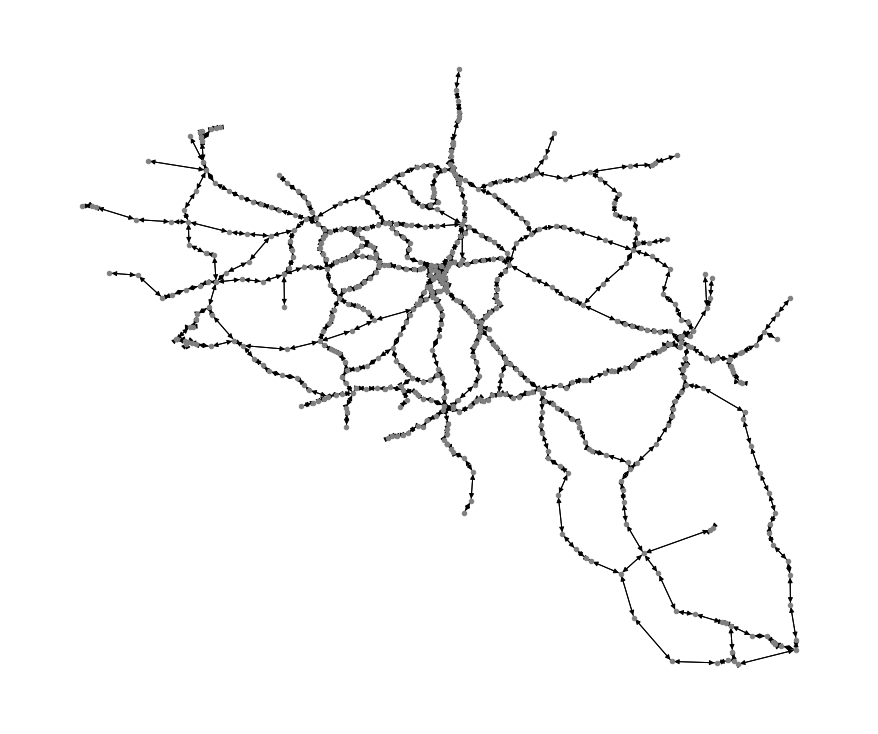

In [11]:
# ----------------------------------------------------------------- #
# Read station data
# ----------------------------------------------------------------- #

filename = 'graphdataformodel_onemonth_manuallyedited.graphml'
gg = nx.read_graphml(filename)
obs = []
for n in gg.nodes():
    obs.append([str(n)] + [gg.nodes[n][feat] for feat in ['name', 'lat', 'lon']])
    
stationdata = pd.DataFrame(obs, columns=['ID', 'Name', 'lat', 'lon'])
stationdata.set_index('ID', inplace=True) #index on ID
stationdata.head() #show what it looks like

positions = {}
for i in range(len(stationdata)):
    positions[stationdata.index[i]] = (stationdata.lon[i],stationdata.lat[i])
betweenness_cent = nx.betweenness_centrality(gg)

# ----------------------------------------------------------------- #
# Draw a network graph
# ----------------------------------------------------------------- #

fig = plt.figure(figsize=(12,10), facecolor="black")
#pos = get_geo_position(g_geo)
nx.draw(gg, pos = positions, node_color='grey', node_size=20)
plt.show()


 You will need module community in python.

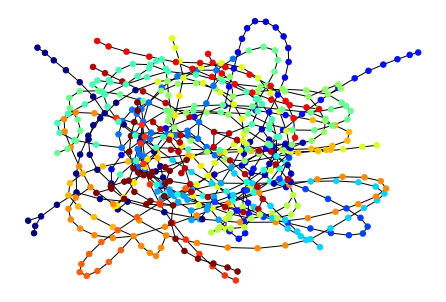

In [5]:
import networkx as nx
import community

G = g_geo#nx.random_graphs.powerlaw_cluster_graph(300, 1, .4)

part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)



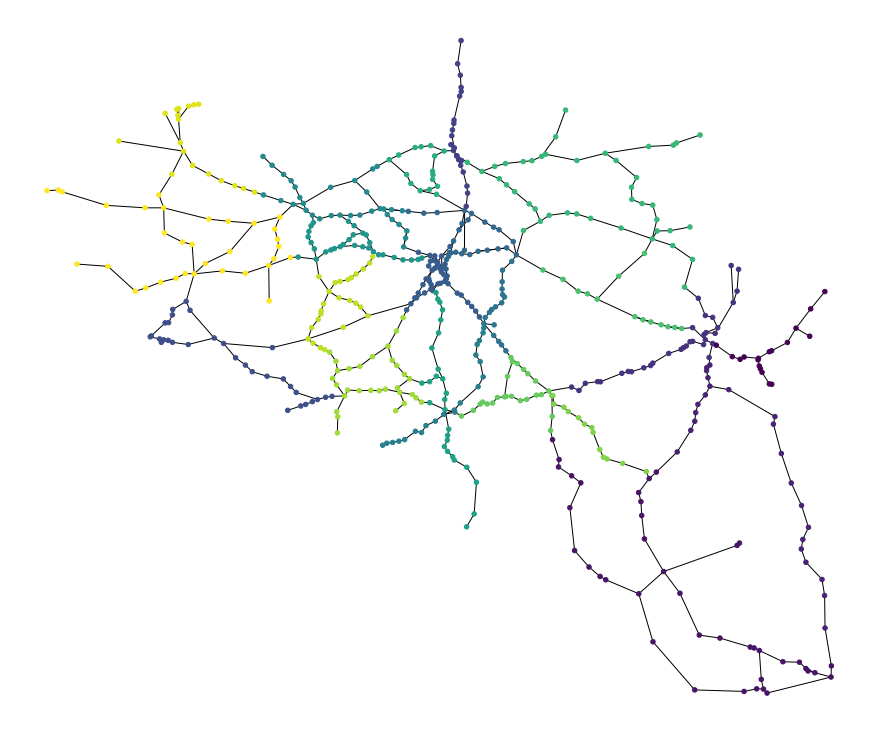

In [5]:


G = g_geo#nx.random_graphs.powerlaw_cluster_graph(300, 1, .4)

part = community.best_partition(G)


# g_cc 
g_cc = deepcopy(g_geo)
zero_degree = []
for u in g_cc.nodes(): # loop through nodes of a graph
#     if g_cc.node[u]["name"] not in city_names_fr and g_cc.node[u]["name"] not in city_names_nl:
#         print(g_cc.node[u]["name"])
    if g_cc.degree(u) ==0:
        zero_degree.append(u)
g_cc.remove_nodes_from(zero_degree)


# draw the network as a graph
warnings.filterwarnings("ignore")
def get_geo_position(g_geo):
    pos = {}
    for u in g_geo.nodes():
        pos[u] = [g_geo.node[u]["lon"], g_geo.node[u]["lat"]]
    return pos


values = [part.get(node) for node in G.nodes()]

fig = plt.figure(figsize=(12,10), facecolor="black")
pos = get_geo_position(g_geo)
nx.draw(g_geo, pos, node_color = values, node_size=20) # draw network color according to community
plt.show()

## Network centrality measures 

There are some measures connected to spectral properties: e.g *eigenvector centrality*. 
Now we can also look at eigenvector centrality,  is a measure of the influence of a node in a network. Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

In [ ]:
import networkx as nx 
# now we want to plot size of nodes proportional to it 

eig_cen = nx.eigenvector_centrality(G)
eig_size = [v * 0.1 for v in eig_cen]
nx.draw(G,  node_size = eig_size)
plt.show()


deg_seq = nx.degree(G)
deg_size=[v * 10 for v in deg_seq]
nx.draw(G,  node_size = deg_size)
plt.show()

